In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Comparison the loss functions of G

### The loss function of D
$$J^{(D)}(\theta^{(D)}, \theta^{(G)})=-\frac{1}{2}E_{x〜p_{data}}logD(x)-\frac{1}{2}E_{z〜p_{z}}log(1-D(G(z)))$$


* The inner loop of GAN algo will minimize $J^{(D)}$ w.r.t  $\theta^{(D)}$ to train D

$$\theta^{(D)*}=\underset{\theta^{(D)}}argmin\ J^{(D)}(\theta^{(D)}, \theta^{(G)})$$


### Minimax game:
* The loss function of G is $J^{(G)}=-J^{(D)}$
        
* Let $V(\theta^{(D)}, \theta^{(G)})=J^{(D)}(\theta^{(D)}, \theta^{(G)})$
    
* Then, the minimax game representation is:

$$\theta^{(G)*}=\underset{\theta^{(G)}}argmax\ \underset{\theta^{(D)}}argmin\ V(\theta^{(D)}, \theta^{(G)})$$

$$\theta^{(G)*}=\underset{\theta^{(G)}}argmax\ -\frac{1}{2}E_{z〜p_{z}}log(1-D(G(z)))$$

$$=\underset{\theta^{(G)}}argmin\ \frac{1}{2}E_{z〜p_{z}}log(1-D(G(z)))$$

* When D is improved, D(G(z)) near to 0, then the gradient of $log(1-D(G(z)))$ is saturated (converge to 0). This make G hard to learn. 


# Non-saturating game vs minimax game
* Let's consider 2 functions which can be used in G loss function:
    * $- logD(G(Z))$
    * $log[1-D(G(Z))]$

where $D \in [0;1]$

* Look at the following chart, we can see that when D near to 0, $log[1-D(G(Z))]$ has low gradient, while $- logD(G(Z))$ has high gradient.

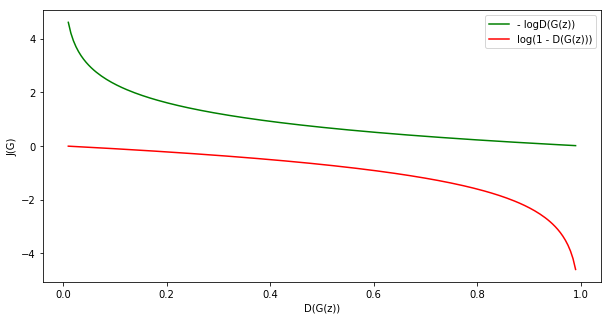

In [35]:
plt.figure(figsize=(10,5))
x = np.linspace(0.01, 0.99, 200)
y1 = -np.log(x)
y2 = np.log(1-x)
plt.plot(x, y1,color='green', label='- logD(G(z))')
plt.plot(x, y2,color='red', label='log(1 - D(G(z)))')
plt.xlabel('D(G(z))')
plt.ylabel('J(G)')
plt.legend()
plt.show()

* In other words, one trick to solve the low gradient problem in minimax game is to optimize the following function for G:

$$\theta^{(G)*}=\underset{\theta^{(G)}}argmin\ -\frac{1}{2}E_{z〜p_{z}}logD(G(z))$$


# Improved version of G loss function for slide

$\underset{\theta_g}min [-E_{z〜p(z)}\ log(D_{\theta_d}(G_{\theta_g}(z)))]$

$\underset{\theta_d}min[-E_{x〜p_{data}}\ log(D_{\theta_d}(x))-E_{z〜p(z)}\ log(1-D_{\theta_d}(G_{\theta_g}(z)))]$